# Final Project: Exploratory Data Analysis
This is the exploratory data analysis of the Spotify Data Set from Kaggle

In [20]:
#imported libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

In [21]:
#Reading in dataset
df = pd.read_csv('data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Important Features to look at
- ID: The ID is simply a unique identification given to a song. This means every row in ID is unique and in no way helps in any model needed. The ID column will be dropped.
- Name: Being realistic we can see that the Name of the song just doesn't give us any important data for our model and would simply just take up space. 
- Release Date: The release date column and year are correlated together because the year just takes the year given from the release date column. So in this case I will drop the release date column.

In [22]:
#Dropping columns
df = df.drop(['id'], axis = 1)
df = df.drop(['name'], axis = 1)
df = df.drop(['release_date'], axis = 1)
#Check for null values
print(df.isnull().sum()/df.shape[0])
print(df.shape)

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
popularity          0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64
(174389, 16)


In [23]:
#Checking for duplicates and removal of duplicates
df.duplicated().sum()
df = df[~df.duplicated()==1]
print(df.shape)

(170937, 16)


# Exploratory Data Analysis

In [24]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']

## Numeric Heatmap

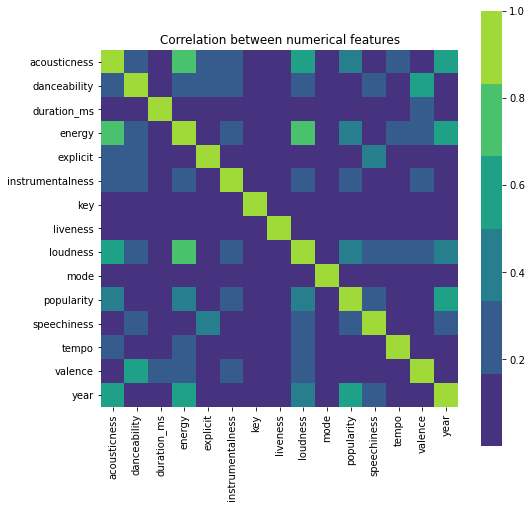

In [25]:
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("viridis")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features')
plt.show()

In [26]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f}')

The most linear correlated features to POPULARITY are:
year              -->  0.55
acousticness      -->  0.41
loudness          -->  0.35
energy            -->  0.34
instrumentalness  -->  0.30
speechiness       -->  0.20


## Top 20 Popular Artists in Dataset

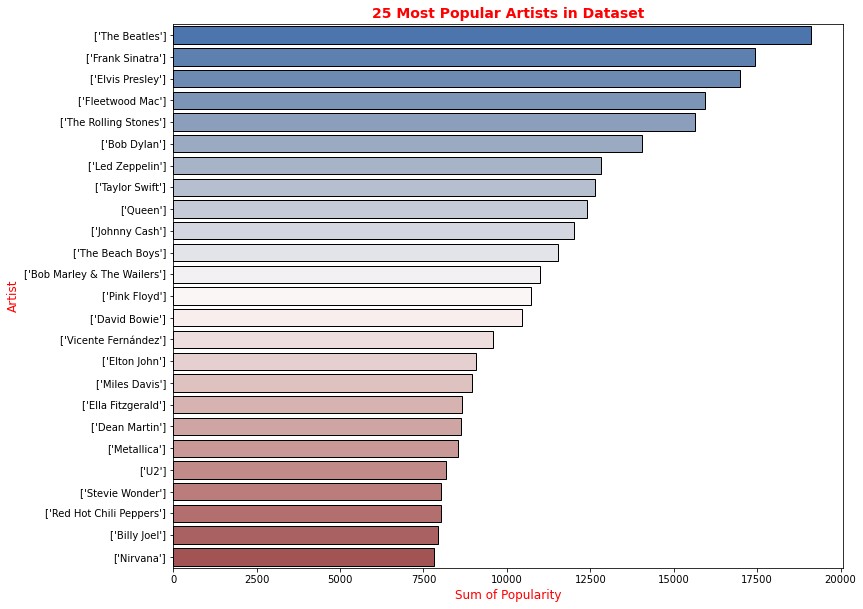

In [27]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(25)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="vlag", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('25 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

# Looking at the features that are correlated the most to the popularity of a song

## Acousticness

The pearson corr is   -0.413  


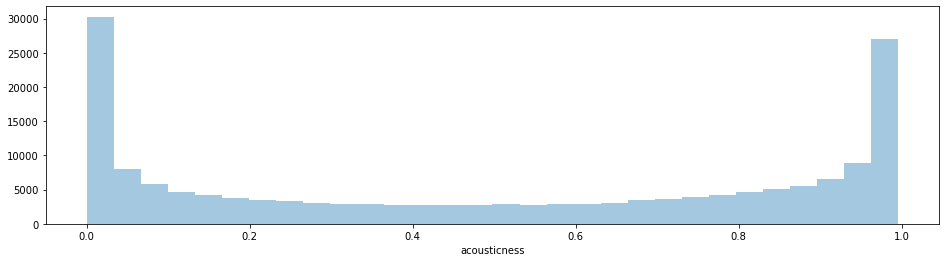

In [34]:
a= df['acousticness'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(df['acousticness'], kde=False, bins=30)
plt.show()

## Loudness

The pearson corr is   0.349   


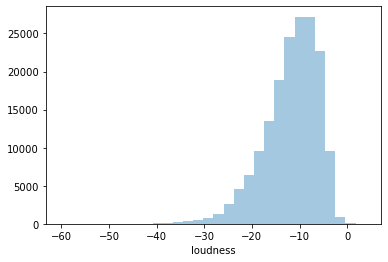

In [41]:
a= df['loudness'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')
sns.distplot(df['loudness'], kde = False, bins=30)
plt.show()

## Energy

The pearson corr is   0.343   


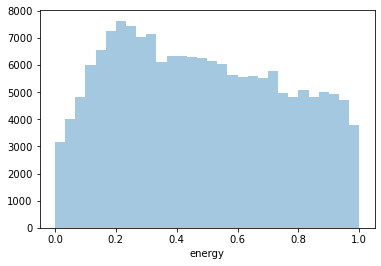

In [35]:
a= df['energy'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')
sns.distplot(df['energy'], kde = False, bins=30)
plt.show()

## Instrumentalness

The pearson corr is   -0.296  


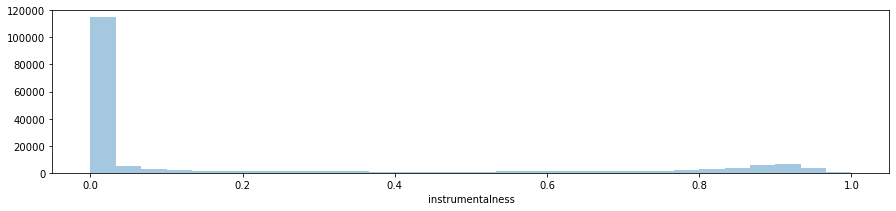

In [39]:
a= df['instrumentalness'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')
fig, ax = plt.subplots(figsize = (15,3))
ax = sns.distplot(df['instrumentalness'], kde = False, bins=30)
plt.show()

## Speechiness

The pearson corr is    -0.2   


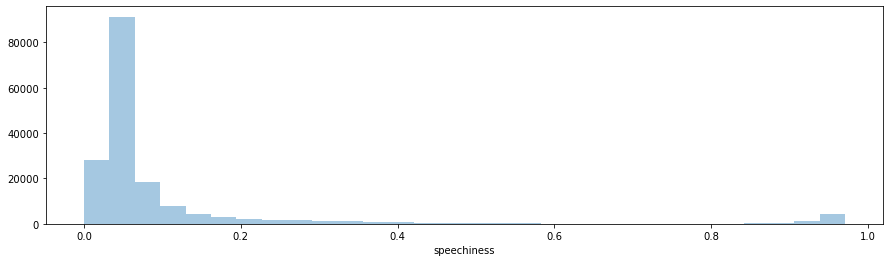

In [40]:
a= df['speechiness'].corr(df['popularity']).round(3)
print(f'The pearson corr is {a:^10}')
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(df['speechiness'], kde = False, bins=30)
plt.show()